THIS FILE DOES NOT CONTAIN THE FINAL MODEL!

This file was used to experiment using the continuous data with Gaussian Bayesian Netorks.



In [62]:
import pandas as pd
import numpy as np
from math import floor
from scipy.io import arff
from sklearn import preprocessing
from pgmpy.models import LinearGaussianBayesianNetwork
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE, display_plot_ipython
from causalnex.structure import StructureModel
from pyvis import network
import networkx as nx
from causalnex.network import BayesianNetwork
from matplotlib import pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from causalnex.evaluation import classification_report
from causalnex.inference import InferenceEngine

Data using downloaded files

In [63]:
X: pd.DataFrame
y: pd.DataFrame

arff_file_year_5 = arff.loadarff('PolishBankruptcy/5year.arff')

df = pd.DataFrame(arff_file_year_5[0])
df = pd.DataFrame(arff_file_year_5[0])
for i in range(len(df)):
    if df.loc[i, 'class'] == b'0':
        df.loc[i, 'class'] = 0.0
    else:
        df.loc[i, 'class'] = 1.0

#df

Standardizing Data

In [64]:
data = df.dropna()
scaler = preprocessing.StandardScaler() 
data_scaled = scaler.fit_transform(data)
data_scaled_transposed = data_scaled.transpose()

attribute_names = [
    "X1",
    "X2",
    "X3",
    "X4",
    "X5",
    "X6",
    "X7",
    "X8",
    "X9",
    "X10",
    "X11",
    "X12",
    "X13",
    "X14",
    "X15",
    "X16",
    "X17",
    "X18",
    "X19",
    "X20",
    "X21",
    "X22",
    "X23",
    "X24",
    "X25",
    "X26",
    "X27",
    "X28",
    "X29",
    "X30",
    "X31",
    "X32",
    "X33",
    "X34",
    "X35",
    "X36",
    "X37",
    "X38",
    "X39",
    "X40",
    "X41",
    "X42",
    "X43",
    "X44",
    "X45",
    "X46",
    "X47",
    "X48",
    "X49",
    "X50",
    "X51",
    "X52",
    "X53",
    "X54",
    "X55",
    "X56",
    "X57",
    "X58",
    "X59",
    "X60",
    "X61",
    "X62",
    "X63",
    "X64",
    "class"
]


attribute_dict = {}

for i in range(len(data_scaled_transposed)):
    attribute_dict[attribute_names[i]] = data_scaled_transposed[i]


standardisedData = pd.DataFrame(attribute_dict)
#standardisedData


Normalize Data

In [65]:
data
normalizer = preprocessing.Normalizer()
data_normalised = normalizer.fit_transform(data)
data_normalised_transposed = data_normalised.transpose()

normalised_dict = {}

for i in range(len(data_normalised_transposed)):
    normalised_dict[attribute_names[i]] = data_normalised_transposed[i]


normalisedData = pd.DataFrame(normalised_dict)
#normalisedData

Normalised and Standardised data

In [66]:

normalizer = preprocessing.Normalizer()
data_normalised_standardised = normalizer.fit_transform(standardisedData)
data_normalised_standardised_transposed = data_normalised_standardised.transpose()

normalised_standardised_dict = {}

for i in range(len(data_normalised_standardised_transposed)):
    normalised_standardised_dict[attribute_names[i]] = data_normalised_standardised_transposed[i]


normalised_StandardisedData = pd.DataFrame(normalised_standardised_dict)
#normalised_StandardisedData

Removal of Features

Selecting financial ratio features as per study dine by [Chen and Shimerda 1981] Kung H Chen and Thomas A Shimerda. An empirical analysis of useful
financial ratios. Financial management, pages 51–60, 1981.

Features I need: 

X23	net profit / sales \
X1	net profit / total assets \
X7	EBIT / total assets \
X49	EBITDA (profit on operating activities - depreciation) / sales \
X9	sales / total assets \
X3	working capital / total assets \
X2	total liabilities / total assets \
X59	long-term liabilities / equity \
X6	retained earnings / total assets \
X4	current assets / short-term liabilities \
X51	short-term liabilities / total assets \
X8	book value of equity / total liabilities \

Feature selection done by looking at the analysis done by  Zięba, M., Tomczak, S.K. and Tomczak, J.M., 2016. Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction. Expert systems with applications, 58, pp.93-101.

This paper used the same dataset, and did an analysis on the most most features used by their Ensemble Boosted Trees classification model. 

These features are 

X52: 5 occurrences\
X40: 5 occurrences\
X25: 5 occurrences\
X5: 4 occurrences\
X9: 4 occurrences\
X13: 4 occurrences\
X58: 4 occurrences\
X15: 4 occurrences\
X27: 4 occurrences\
X36: 4 occurrences\
X22: 4 occurrences\
X42: 4 occurrences\
X31: 4 occurrences\
X48: 4 occurrences\
X32: 3 occurrences\
X57: 3 occurrences\
X12: 3 occurrences\
X35: 3 occurrences\
X6: 3 occurrences\
X53: 3 occurrences\
X16: 2 occurrences\
X11: 2 occurrences\
X55: 2 occurrences\
X14: 2 occurrences\
X29: 2 occurrences\
X41: 2 occurrences\






In [67]:

keeping_attributes = [
    "X23",
    "X1",
    "X7",
    "X49",
    "X9",
    "X3",
    "X2",
    "X59",
    "X6",
    "X4",
    "X51",
    "X8",
    "class"
]
most_common_attributes = ['X52', 'X40', 'X25', 'X5', 'X9', 'X13', 'X58', 'X15', 'X27', 'X36', 'X22', 'X42', 'X31', 'X48', 'X32', 'X57', 'X12', 'X35', 'X6', 'X53', 'X16', 'X11', 'X55', 'X14', 'X29', 'X41','class']

most_common_attributes_all_years = ['X16', 'X52', 'X32', 'X28', 'X5', 'X40', 'X9', 'X11', 'X59', 'X23', 'X25', 'X55', 'X17', 'X14', 'X29', 'X13', 'X58', 'X30', 'X57', 'X56', 'X40', 'X15', 'X27', 'X5', 'X25', 'X36', 'X22', 'X42', 'X31', 'X13', 'X12', 'X35', 'X9', 'X58', 'X11', 'X48', 'X52', 'X57', 'X55', 'X6', 'X15', 'X22', 'X52', 'X27', 'X40', 'X5', 'X25', 'X31', 'X12', 'X42', 'X13', 'X53', 'X57', 'X37', 'X48', 'X6', 'X35', 'X41', 'X32', 'X36', 'X22', 'X52', 'X15', 'X25', 'X27', 'X40', 'X58', 'X42', 'X13', 'X36', 'X31', 'X5', 'X53', 'X6', 'X35', 'X48', 'X9', 'X24', 'X38', 'X29', 'X25', 'X22', 'X27', 'X15', 'X52', 'X53', 'X14', 'X40', 'X42', 'X36', 'X54', 'X12', 'X58', 'X41', 'X44', 'X48', 'X9', 'X31', 'X32', 'X16', 'class']

for attribute in normalised_StandardisedData.columns.values.tolist():
    if attribute not in keeping_attributes:
        del normalised_StandardisedData[attribute]

normalised_StandardisedData

,X1,X2,X3,X4,X6,X7,X8,X9,X23,X49,X51,X59,class
0,0.002234,0.006792,-0.184042,-0.059534,0.005123,0.007875,-0.145905,-0.071068,0.014845,0.021686,0.193848,-0.020545,-0.062446
1,-0.006000,0.006409,-0.062029,-0.045918,-0.005906,0.005904,-0.105580,0.031895,0.008004,0.011732,0.067266,-0.012018,-0.060560
2,0.007241,0.013735,0.424039,-0.039381,0.001295,0.013213,-0.208003,-0.108437,0.023187,0.034651,0.340387,-0.026531,-0.098348
3,0.000188,-0.008026,-0.067861,0.036893,0.005817,0.007223,0.359358,-0.035590,0.043910,0.040032,-0.352250,-0.009541,-0.061774
4,0.014284,-0.002517,0.277337,0.047084,0.005636,0.013780,0.066866,-0.050154,0.036594,0.051931,-0.310865,-0.007089,-0.089474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,-0.006250,0.007521,-0.047297,-0.026342,-0.002942,0.002246,-0.090735,-0.058742,0.002700,0.003152,0.143585,-0.009314,0.879120
3027,0.004321,0.002656,0.136199,-0.004096,-0.003059,0.004117,-0.046269,-0.024689,0.011620,0.012548,0.006862,-0.002649,0.900715
3028,0.003086,0.024247,-0.354730,-0.038684,-0.007035,0.003371,-0.127255,0.209372,0.003589,0.004014,0.248329,-0.036897,0.757829
3029,-0.015976,0.018111,-0.268196,-0.035617,-0.021535,0.000355,-0.124292,0.094309,-0.003322,-0.000489,0.295848,-0.020944,0.814386


Split Data into training and testing

In [68]:

# discretising class column

atttributes = normalised_StandardisedData.columns.values.tolist()
normalised_StandardisedData_dict = {}
for i in range(len(atttributes)):
    normalised_StandardisedData_dict[atttributes[i]] = normalised_StandardisedData[atttributes[i]]

normalised_StandardisedData_dict[atttributes[len(atttributes)-1]] = pd.cut(normalised_StandardisedData["class"],2,labels=False)
normalised_StandardisedData_class = pd.DataFrame(normalised_StandardisedData_dict)



#Splitting data 

processed_bankrupt = normalised_StandardisedData_class.loc[normalised_StandardisedData_class["class"] == 1]
processed_nonbunkrupt = normalised_StandardisedData_class.loc[normalised_StandardisedData_class["class"] == 0]

processed_bankrupt_train = processed_bankrupt[0:(floor(0.75*processed_bankrupt.shape[0]))]
processed_nonbankrupt_train = processed_nonbunkrupt[0:(floor(0.75*processed_nonbunkrupt.shape[0]))]

processed_bankrupt_test = processed_bankrupt[(floor(0.75*processed_bankrupt.shape[0]))+1:processed_bankrupt.shape[0]]
processed_nonbankrupt_test = processed_nonbunkrupt[(floor(0.75*processed_nonbunkrupt.shape[0]))+1:processed_nonbunkrupt.shape[0]]

training_data = pd.concat([processed_nonbankrupt_train,processed_bankrupt_train])
training_data

testing_data = pd.concat([processed_nonbankrupt_test,processed_bankrupt_test])


testing_evidence_list= []
for i in range(len(testing_data)):
    testing_evidence_dict = {}
    for z in range(len(testing_data.columns.values.tolist())):
        testing_evidence_dict[testing_data.columns.values.tolist()[z]] = testing_data[testing_data.columns.values.tolist()[z]].iloc[i]
    testing_evidence_list.append(testing_evidence_dict)
training_data


,X1,X2,X3,X4,X6,X7,X8,X9,X23,X49,X51,X59,class
0,0.002234,0.006792,-0.184042,-0.059534,0.005123,0.007875,-0.145905,-0.071068,0.014845,0.021686,0.193848,-0.020545,0
1,-0.006000,0.006409,-0.062029,-0.045918,-0.005906,0.005904,-0.105580,0.031895,0.008004,0.011732,0.067266,-0.012018,0
2,0.007241,0.013735,0.424039,-0.039381,0.001295,0.013213,-0.208003,-0.108437,0.023187,0.034651,0.340387,-0.026531,0
3,0.000188,-0.008026,-0.067861,0.036893,0.005817,0.007223,0.359358,-0.035590,0.043910,0.040032,-0.352250,-0.009541,0
4,0.014284,-0.002517,0.277337,0.047084,0.005636,0.013780,0.066866,-0.050154,0.036594,0.051931,-0.310865,-0.007089,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,-0.008059,0.000136,-0.015748,-0.014380,0.003879,0.003578,-0.002507,-0.082305,0.000680,0.016311,-0.081215,-0.001815,1
3001,-0.011593,0.008218,-0.215147,-0.041472,-0.003093,0.001460,-0.096643,0.065072,-0.001086,0.000232,0.051146,0.006689,1
3002,-0.007632,0.002717,-0.107026,-0.031829,-0.003058,0.001966,-0.046966,0.070602,0.000933,0.000951,-0.086804,0.000904,1
3003,-0.022844,0.006617,-0.213478,-0.041218,-0.002935,-0.000621,-0.083995,-0.003092,-0.010722,-0.008335,0.027658,0.013197,1


Gaussian Network stuff

In [69]:
sm = StructureModel()
sm = from_pandas(training_data)
sm.remove_edges_below_threshold(0.2)

Display Graph

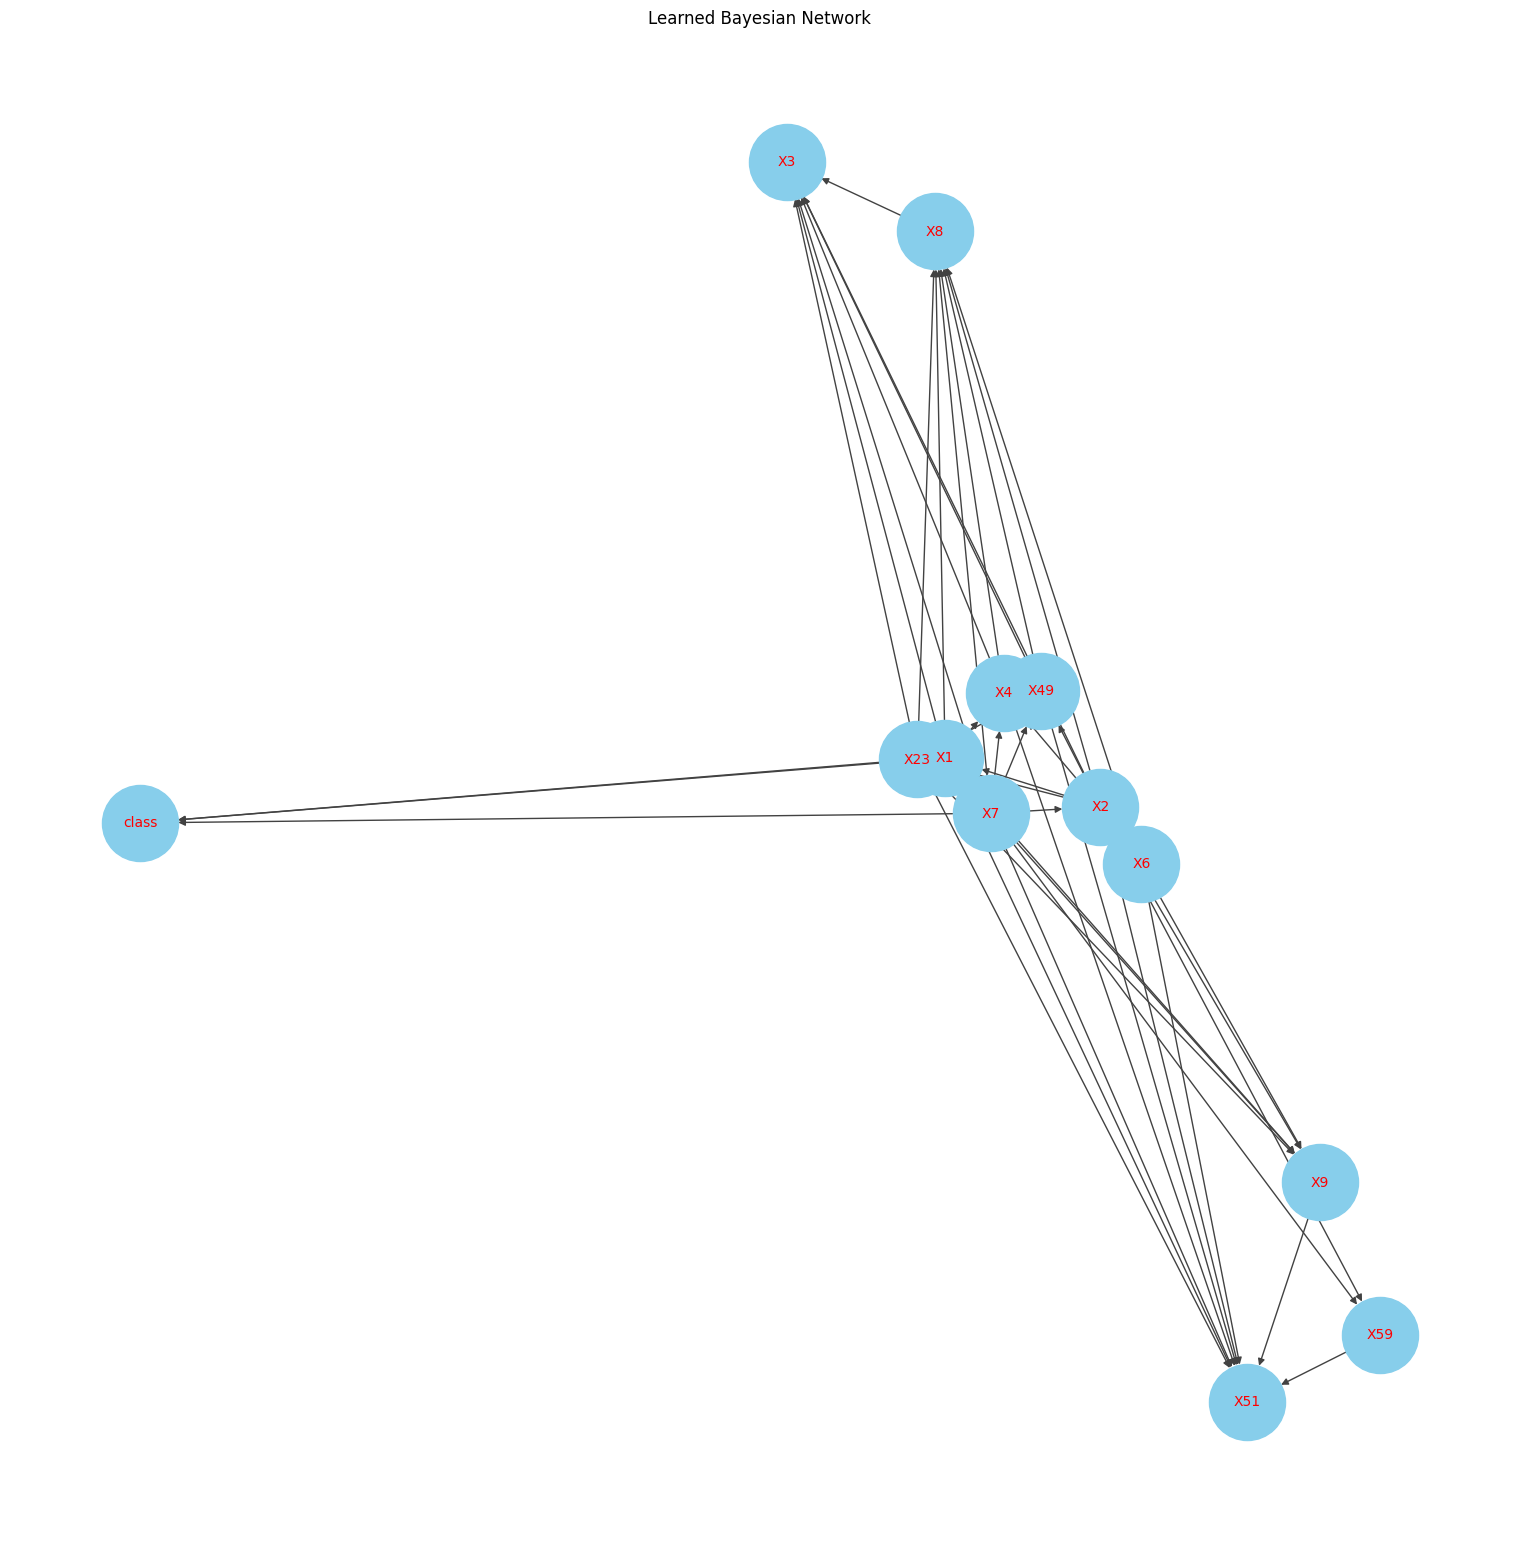

In [70]:
nx_graph = nx.DiGraph(sm.edges())
pos = nx.spring_layout(nx_graph)
plt.figure(figsize=(15, 15))
nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color = 'skyblue', edge_color='#424242',font_size=10,font_color='red')
plt.title('Learned Bayesian Network')
plt.show()

Training Data discretization

In [71]:
atttributes = training_data.columns.values.tolist()

discretized_dict = {}

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', subsample=200_000,dtype=np.float32)
est.fit(training_data)
PreprocessedData_tranformed = est.transform(training_data).transpose()


for i in range(len(PreprocessedData_tranformed)):
    discretized_dict[atttributes[i]] = PreprocessedData_tranformed[i]

discretized_dict[atttributes[len(atttributes)-1]] = pd.cut(training_data['class'],2,labels=[0,1])
discretized_TrainingData = pd.DataFrame(discretized_dict)
    
discretized_TrainingData

c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  warnings.warn(


,X1,X2,X3,X4,X6,X7,X8,X9,X23,X49,X51,X59,class
0,3.0,2.0,1.0,1.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,1.0,0
1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,0
2,3.0,3.0,4.0,2.0,4.0,4.0,1.0,1.0,4.0,4.0,4.0,0.0,0
3,3.0,0.0,1.0,4.0,4.0,2.0,4.0,3.0,4.0,4.0,0.0,2.0,0
4,4.0,1.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2.0,1.0,2.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,2.0,3.0,1
3001,2.0,2.0,1.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,3.0,3.0,1
3002,2.0,2.0,1.0,2.0,3.0,0.0,3.0,3.0,0.0,1.0,2.0,3.0,1
3003,0.0,2.0,1.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,3.0,3.0,1


Parameter estimation

In [72]:
bn = BayesianNetwork(sm)
bn = bn.fit_node_states(discretized_TrainingData)
print(np.shape(discretized_TrainingData))
bn = bn.fit_cpds(discretized_TrainingData, method="BayesianEstimator", bayes_prior="BDeu", equivalent_sample_size=30)
#bn.cpds['class']

(2273, 13)


Disctretise Testing data

In [74]:
atttributes = testing_data.columns.values.tolist()

discretized_testing_data_dict = {}

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', subsample=200_000)
est.fit(testing_data)
testing_data_tranformed = est.transform(testing_data).transpose()


for i in range(len(testing_data_tranformed)):
    discretized_testing_data_dict[atttributes[i]] = testing_data_tranformed[i]


discretized_testing_data_dict[atttributes[len(atttributes)-1]] = pd.cut(testing_data['class'],2,labels=[0,1])

discretized_testing_Data = pd.DataFrame(discretized_testing_data_dict)
    
discretized_testing_Data

c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  warnings.warn(


,X1,X2,X3,X4,X6,X7,X8,X9,X23,X49,X51,X59,class
2200,0.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,0
2201,1.0,1.0,4.0,3.0,2.0,3.0,3.0,0.0,3.0,3.0,0.0,2.0,0
2202,2.0,2.0,2.0,1.0,4.0,3.0,2.0,0.0,3.0,3.0,3.0,0.0,0
2203,3.0,1.0,3.0,3.0,4.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,0
2204,0.0,4.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,2.0,2.0,2.0,3.0,3.0,0.0,2.0,2.0,1.0,1.0,3.0,2.0,1
3027,3.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,2.0,2.0,3.0,1
3028,3.0,4.0,0.0,2.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,0.0,1
3029,1.0,4.0,0.0,2.0,0.0,0.0,2.0,4.0,0.0,0.0,4.0,1.0,1


Inference

In [75]:
predictions = bn.predict(discretized_testing_Data, "class")
print(f"The prediction is '{predictions.loc[3027, 'class_prediction']}'")
print(f"The ground truth is '{discretized_testing_Data.loc[3027, 'class']}'")
#predictions

# I could not get inference to work using the inference engine so I only used the ".predict" function
# The inference engine was taking too long to run (100 minutes +)

#print(bn.nodes)
#ie = InferenceEngine(bn)

predictions

The prediction is '0'
The ground truth is '1'


,class_prediction
2200,0
2201,0
2202,0
2203,0
2204,0
...,...
3026,0
3027,0
3028,0
3029,0


In [ ]:
# inferene continued

#observations_list = []
#
#for i in range(len(discretized_testing_Data)):
#    observations_dict = {}
#    for attribute in discretized_testing_Data.columns.values.tolist():
#        observations_dict[attribute] = discretized_testing_Data.iloc[i][attribute]
#    observations_list.append(observations_dict)
#print(observations_list)
#

# this is the section that took 100+ minutes to run

#predictions = []
#for i in range(len(discretized_testing_Data)):
#    predictions.append(ie.query(observations = observations_list[i], parallel=True)['class'])
#    print(predictions[i])
#print(predictions)

Model Evaluation

In [76]:
classification_report(bn, discretized_testing_Data, "class")

{'class_0': {'precision': 0.9682119205298013,
  'recall': 0.9986338797814208,
  'f1-score': 0.9831876260928044,
  'support': 732.0},
 'class_1': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 24.0},
 'accuracy': 0.966931216931217,
 'macro avg': {'precision': 0.48410596026490066,
  'recall': 0.4993169398907104,
  'f1-score': 0.4915938130464022,
  'support': 756.0},
 'weighted avg': {'precision': 0.9374750341637759,
  'recall': 0.966931216931217,
  'f1-score': 0.9519753205025567,
  'support': 756.0}}